# Carregando os dados

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pandas as pd
df_train = pd.read_csv("/kaggle/input/analise-de-inadimplencia-praso/train.csv")
df_train.head()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,cnae_descricao,capital_social,idade_cnpj,...,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_credores,serasa_socio_tem_negativacao,ifood_contagem_avaliacoes,ifood_faixa_preco,google_maps_avaliacao,google_maps_contagem_avaliacoes,google_maps_tem_website,inadimplente
0,0,PE,RECIFE,Restaurante Brasileiro,213-5 - Empresário (Individual),Fonte 5,56.11-2-01,Restaurantes e similares,"(8000, 10000]","(50, 100]",...,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1
1,1,PE,CHA GRANDE,Pizza & Massas,213-5 - Empresário (Individual),Fonte 2,56.11-2-01,Restaurantes e similares,"(3000, 5000]","(750, 900]",...,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1
2,2,PB,JOAO PESSOA,Doces & Confeitaria,213-5 - Empresário (Individual),Fonte 2,10.93-7-01,Fabricação de produtos derivados do cacau e de...,"(200, 1000]","(150, 250]",...,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0
3,3,CE,CASCAVEL,Lanches & Salgados,213-5 - Empresário (Individual),Fonte 2,56.20-1-04,Fornecimento de alimentos preparados preponder...,"(1000, 1500]","(100, 150]",...,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1
4,4,PE,RECIFE,Mercearia & Mercado,213-5 - Empresário (Individual),Fonte 2,56.11-2-03,"Lanchonetes, casas de chá, de sucos e similares","(200, 1000]","(1600, 2000]",...,0,47.0,Bancos e Financeiro,0,NaN,NaN,NaN,NaN,NaN,0


# Pré processamento dos dados

In [2]:
X = df_train.loc[:, ['capital_social', 'idade_cnpj', 'segmento_cliente']]
Y = df_train.loc[:, ['inadimplente']].rename({'inadimplente': 'target'}, axis = 1)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False for a dense array

# Fit and transform the data
x_train_encoded = encoder.fit_transform(X_train)
x_test_encoded = encoder.transform(X_test)

# Modelo

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(x_train_encoded, y_train.target.values)

# Make predictions
y_pred = rf.predict(x_test_encoded)


# Metrificando resultados

In [6]:
# Evaluate accuracy
accuracy = accuracy_score(y_test.target.values, y_pred)
accuracy

0.588314005352364

ROC AUC Score: 0.6047


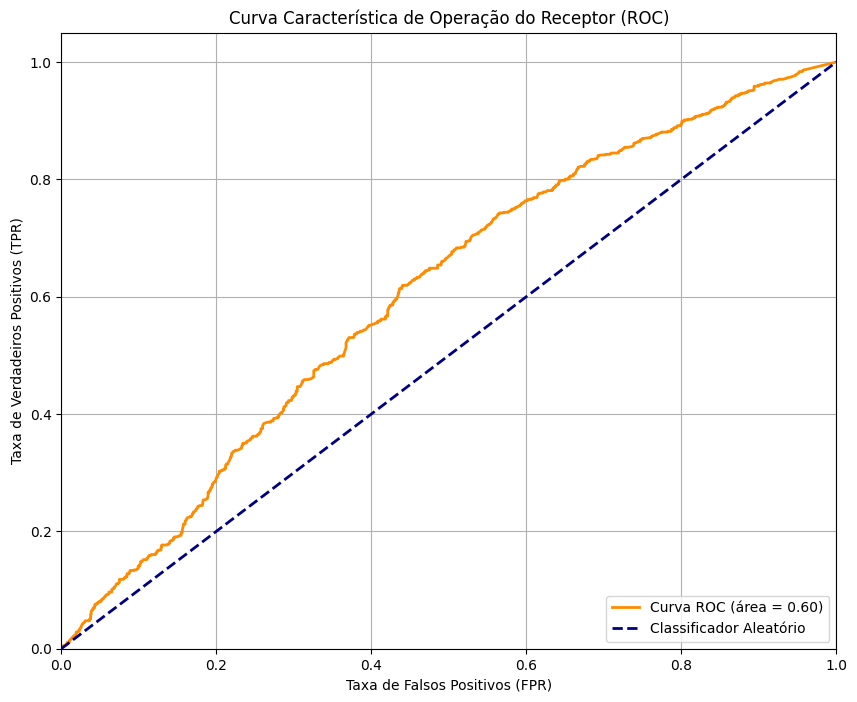

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Para calcular a curva ROC, precisamos das probabilidades da classe positiva.
# O método predict_proba retorna as probabilidades para cada classe [classe_0, classe_1]
y_pred_proba = rf.predict_proba(x_test_encoded)[:, 1]

# Calcular a pontuação ROC AUC
roc_auc_score_value = roc_auc_score(y_test.target.values, y_pred_proba)
print(f"ROC AUC Score: {roc_auc_score_value:.4f}")

# Calcular a curva ROC (taxa de falsos positivos, taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_test.target.values, y_pred_proba)

# Calcular a área sob a curva (AUC) para o plot
roc_auc = auc(fpr, tpr)

# Plotar o gráfico da curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva Característica de Operação do Receptor (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Previsão

In [8]:
import pandas as pd
df_test = pd.read_csv("/kaggle/input/analise-de-inadimplencia-praso/test.csv")
df_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,cnae_descricao,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_credores,serasa_socio_tem_negativacao,ifood_contagem_avaliacoes,ifood_faixa_preco,google_maps_avaliacao,google_maps_contagem_avaliacoes,google_maps_tem_website
0,396,PE,PAULISTA,Japonês & Chinês & Asiático,213-5 - Empresário (Individual),Fonte 5,56.12-1-00,Serviços ambulantes de alimentação,"(200, 1000]","(0, 25]",0,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,247,PE,CARUARU,Lanches & Salgados,213-5 - Empresário (Individual),Fonte 2,56.11-2-01,Restaurantes e similares,"(5000, 8000]","(100, 150]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,9261,PB,CABEDELO,Mercearia & Mercado,213-5 - Empresário (Individual),Fonte 1,47.12-1-00,"Comércio varejista de mercadorias em geral, co...","(5000, 8000]","(1300, 1600]",0,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,1430,CE,FORTALEZA,Restaurante Brasileiro,213-5 - Empresário (Individual),Fonte 2,56.11-2-01,Restaurantes e similares,"(5000, 8000]","(0, 25]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,6472,PE,PAULISTA,Lanches & Salgados,213-5 - Empresário (Individual),Fonte 5,56.11-2-03,"Lanchonetes, casas de chá, de sucos e similares","(2000, 3000]","(0, 25]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [9]:
X_test = df_test.loc[:,['capital_social', 'idade_cnpj', 'segmento_cliente']]
X_test = encoder.transform(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
submission = pd.DataFrame({'id': df_test.id.values, 'target': y_pred_proba})
submission.to_csv('/kaggle/working/submission.csv', index = False)